# 회귀

## 경사하강법

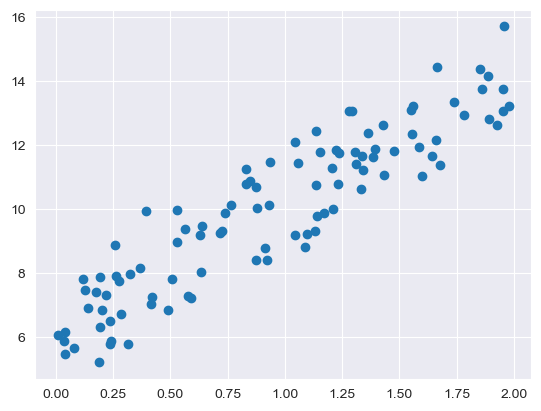

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100, 1)

plt.scatter(X, y)

## LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

boston = load_boston()
bostondf = pd.DataFrame(boston.data, columns = boston.feature_names)
bostondf['PRICE'] = boston.target
print('boston 데이터 세트 크기: ', bostondf.shape)
bostondf.head()

boston 데이터 세트 크기:  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


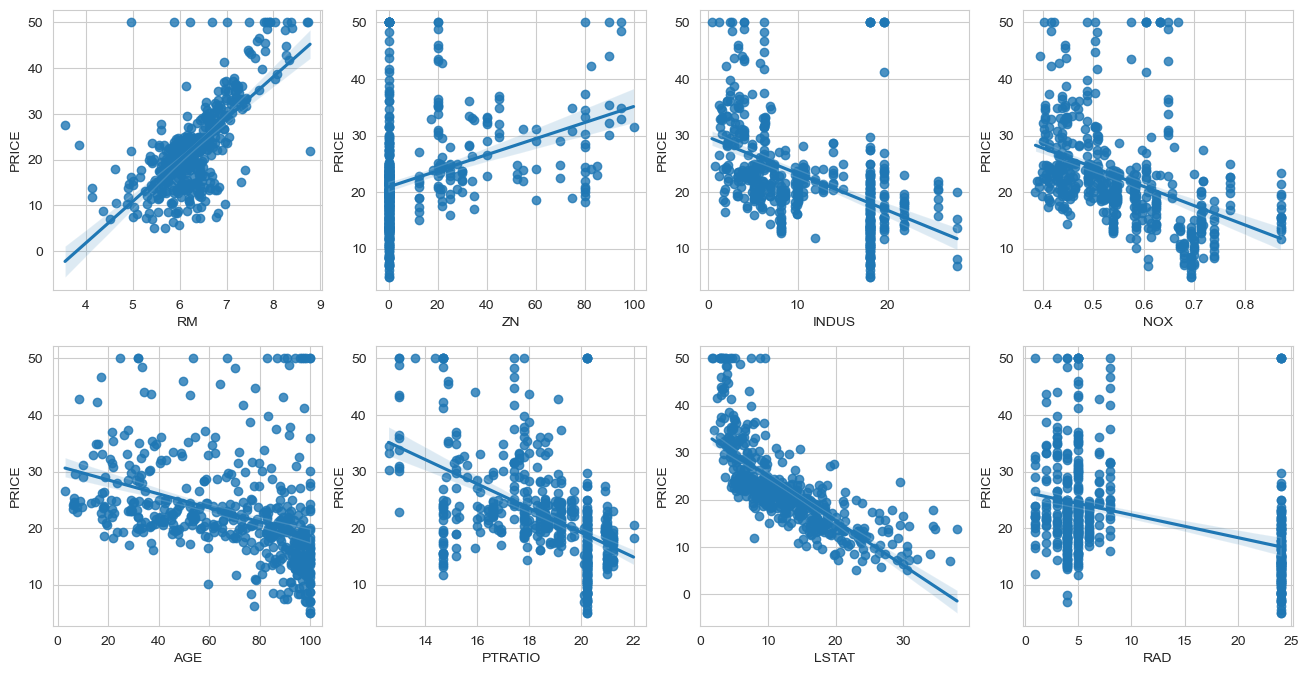

In [6]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='PRICE', data=bostondf, ax=axs[row][col])

In [12]:
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostondf['PRICE']
X_data = bostondf.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 17.297, RMSE: 4.159
Variance score: 0.757


In [13]:
print('절편값: ', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편값:  40.99559517216412
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [14]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [15]:
from sklearn.model_selection import cross_val_score

y_target = bostondf['PRICE']
X_data = bostondf.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores) # 원래 거에다가 -1 곱한 다음에 루트 취해주기
avg_rmse = np.mean(rmse_scores)

print('5 fold의 개별 negative mse scores:', np.round(neg_mse_scores, 2))
print('5 fold의 개별 rmse scores:', np.round(rmse_scores, 2))
print('5 fold의 평균 rmse: {0:.3f}'.format(avg_rmse))

5 fold의 개별 negative mse scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 fold의 개별 rmse scores: [3.53 5.1  5.75 8.99 5.77]
5 fold의 평균 rmse: 5.829


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(4).reshape(2,2)


# 회귀 실습 - 자전거 대여 수요 예측

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

bike_df = pd.read_csv('C:/Users/sgsgk/Documents/machine-learning-example-data/bike_train.csv')
print(bike_df.shape)
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [18]:
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime) # 그냥 열을 datetime 타입으로 변환한거임

bike_df['year'] = bike_df.datetime.apply(lambda x: x.year) # year이라는 새로운 열에 넣어준 거임
bike_df['month'] = bike_df.datetime.apply(lambda x: x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x: x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [19]:
drop_columns = ['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

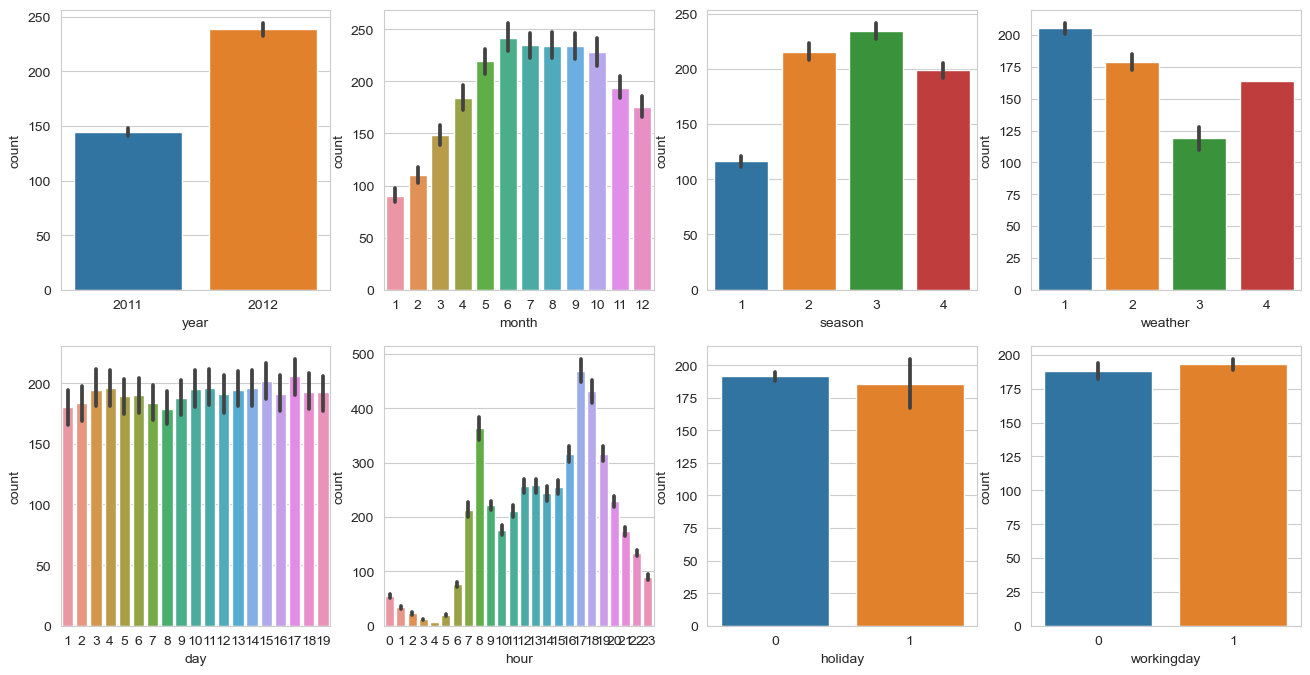

In [21]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
cat_features = ['year', 'month', 'season', 'weather', 'day', 'hour', 'holiday', 'workingday']
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col])
# enumerate : 인덱스(index)와 원소를 동시에 접근하면서 루프를 돌리기

In [22]:
# 평가지표 생성

from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

# 마지막으로 토탈 성능 평가 함수
def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    print('rmsle: {0:.3f}, rmse: {1:.3F}, mae: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# 일단 모델 한번 돌려보기
y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

rmsle: 1.165, rmse: 140.900, mae: 105.924


In [24]:
# 결과 값 비교해보기 (모델링할때 필요한 부분은 아님)
def get_top_error_data(y_test, pred, n_tops=5):
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])

    print(result_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test, pred, 5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<AxesSubplot:>

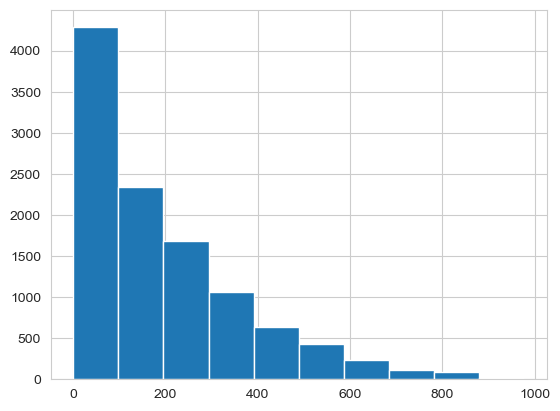

In [25]:
# 칼럼이 정규분포를 이루는지 확인
y_target.hist()

<AxesSubplot:>

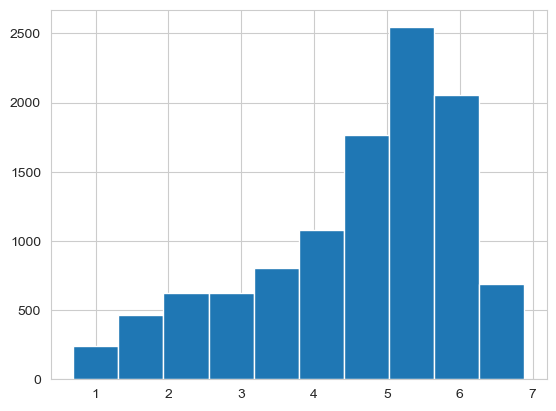

In [26]:
# 정규 분포를 이루지 않는다면 로그를 적용해 변환
y_log_transform = np.log1p(y_target)
y_log_transform.hist()
# 'expm1()' 함수를 이용해서 원래 scale값으로 원상 복구할 수 있음
# 로그 변환을 한 결과 왜곡 정도가 많이 개선되어 보임

In [27]:
y_target_log = np.log1p(y_target)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

y_test_exp = np.expm1(y_test) # 로그 변환한 원래 y_test값 되돌리기
pred_exp = np.expm1(pred) # 로그 변환된 값으로 예측됐으니까 이것도 같이 되돌리기

evaluate_regr(y_test_exp, pred_exp)
# 오히려 성능이 떨어진 성능지표가 존재

rmsle: 1.017, rmse: 162.594, mae: 109.286


<AxesSubplot:>

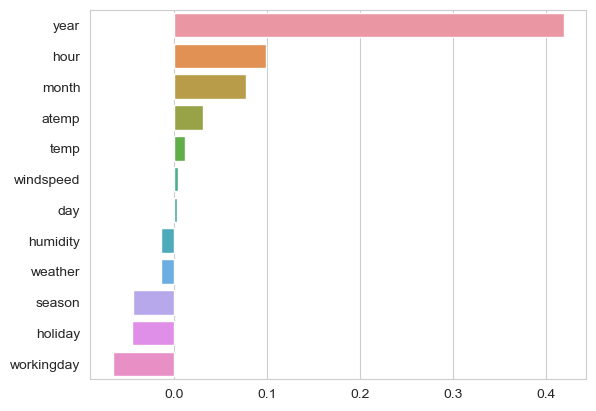

In [28]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index) # x축에 값이 가도록...

In [30]:
# 원핫 인코딩 적용하기
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month', 'day', 'hour', 'holiday',
                                                     'workingday', 'season', 'weather'])
# 원핫 인코딩하고자하는 범주형 feature들 columns에 넣어주기

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.3, random_state=0)

def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###', model.__class__.__name__, '###') # 해당 모델에 맞는 이름을 출력하는 함수다..
    evaluate_regr(y_test, pred)

lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
rmsle: 0.590, rmse: 97.688, mae: 63.382
### Ridge ###
rmsle: 0.590, rmse: 98.529, mae: 63.893
### Lasso ###
rmsle: 0.635, rmse: 113.219, mae: 72.803


<AxesSubplot:>

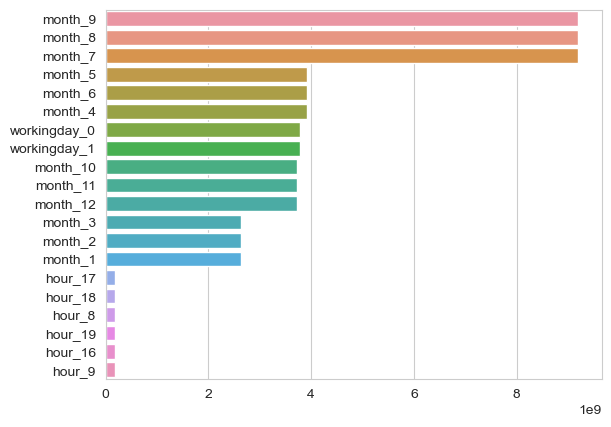

In [35]:
coef = pd.Series(lr_reg.coef_, index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index) # x축에 값이 가도록...

In [36]:
# 회귀트리 이용해서 예측 수행
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimator=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    get_model_predict(model, X_train.values, X_test.values, y_train.values,
                      y_test.values, is_expm1=True)

### RandomForestRegressor ###
rmsle: 0.355, rmse: 50.227, mae: 31.095
### GradientBoostingRegressor ###
rmsle: 0.330, rmse: 53.349, mae: 32.744
[01:36:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


### XGBRegressor ###
rmsle: 0.340, rmse: 52.002, mae: 31.603
### LGBMRegressor ###
rmsle: 0.319, rmse: 47.215, mae: 29.029


# 회귀 실습 - 캐글 주택 가격: 고급 회귀 기법
- 성능 평가 : RMSLE (root mean squared log error)
- 쓰는 이유 : 가격이 비싼 주택일수록 예측 결과 오류가 전체 오류에 미치는 비중이 높으므로 이것을 상쇄하기 위해 오류 값을 로그 변환한 RMSLE를 사용

In [10]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_org = pd.read_csv('C:/Users/sgsgk/Documents/machine-learning-example-data/house_price.csv')
house_df = house_df_org.copy() # copy함수를 씀으로써 원본 데이터에 영향을 미치지 않도록 함
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [11]:
print('데이터 세트의 shape:', house_df.shape)
print('\n전체 피처의 type\n', house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\nNull 칼럼과 그 건수: \n', isnull_series[isnull_series > 0].sort_values(ascending=False))
# ascending=False : 큰 수부터 작은 수를 차례로 출력
# 0보다 크다는 조건을 걸어서 null값을 포함하고 있는 열만 출력

데이터 세트의 shape: (1460, 81)

전체 피처의 type
 object     43
int64      35
float64     3
dtype: int64

Null 칼럼과 그 건수: 
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


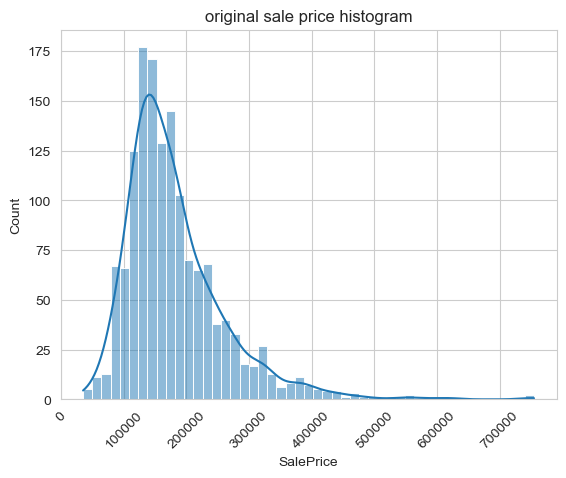

In [12]:
# 먼저 타깃값이 정규분포 형태인지 살펴보기
plt.title('original sale price histogram')
plt.xticks(rotation=45)
sns.histplot(house_df['SalePrice'], kde=True)
plt.show()

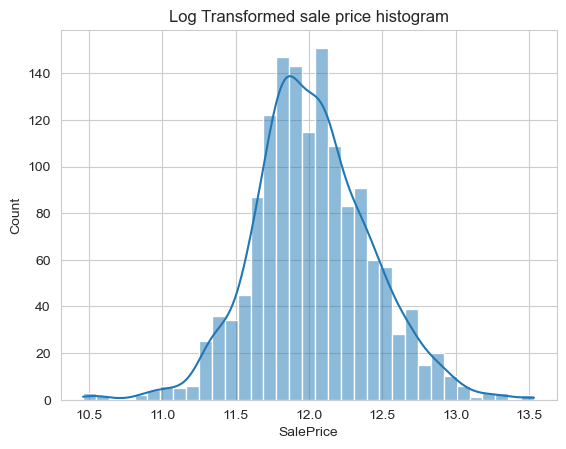

In [13]:
plt.title('Log Transformed sale price histogram')
log_saleprice = np.log1p(house_df['SalePrice'])
sns.histplot(log_saleprice, kde=True)
plt.show()

In [14]:
original_saleprice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice']) # 왜도가 심한 타겟값을 정규 분포 형태로 변환
house_df.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)
# null 값이 너무 많은 열은 그냥 삭제
house_df.fillna(house_df.mean(), inplace=True)
# 전체 평균이 아니라 각 열에 해당하는 평균으로 대체

null_column_count = house_df.isnull().sum()[house_df.isnull().sum()>0]
print('##Null 피처의 type: \n', house_df.dtypes[null_column_count.index])
# null_column_count에 해당하는 인덱스는 그 앞에서 구한 null값을 포함하는 열을 의미함
# house_df의 모든 열에 대한 타입을 출력하는 것이 아닌 인덱스로 지정한 것만
# 출력된 결과를 통해 모두 문자열에만 null값이 존재한다는 것을 확인할 수 있음

##Null 피처의 type: 
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


In [22]:
print('get_dummies() 수행 전 데이터 shape:', house_df.shape)
house_df_ohe = pd.get_dummies(house_df)
print('get_dummies() 수행 후 데이터 shape:', house_df_ohe.shape)

null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]
print('##Null 피처의 type: \n', house_df_ohe.dtypes[null_column_count.index])

get_dummies() 수행 전 데이터 shape: (1460, 75)
get_dummies() 수행 후 데이터 shape: (1460, 271)
##Null 피처의 type: 
 Series([], dtype: object)


In [25]:
# 단일 모델의 RMSE값을 반환
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, '로그 변환 된 RMSE:', np.round(rmse, 3))
    return rmse

# 여러 모델의 RMSE값을 반환
def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환 된 RMSE: 0.132
Ridge 로그 변환 된 RMSE: 0.128
Lasso 로그 변환 된 RMSE: 0.176


[0.13189576579154305, 0.12750846334053026, 0.17628250556471395]

In [28]:
# 피처별 회귀 계수를 시각화해서 모델별로 어떠한 피처의 회귀 계수로 구성되는지 확인
def get_top_bottom_coef(model, n=10):
    coef = pd.Series(model.coef_, index=X_features.columns)
    # 시리즈를 생성하는데 인덱스는 열의 이름으로 값은 그에 해당하는 계수값으로 구성

    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

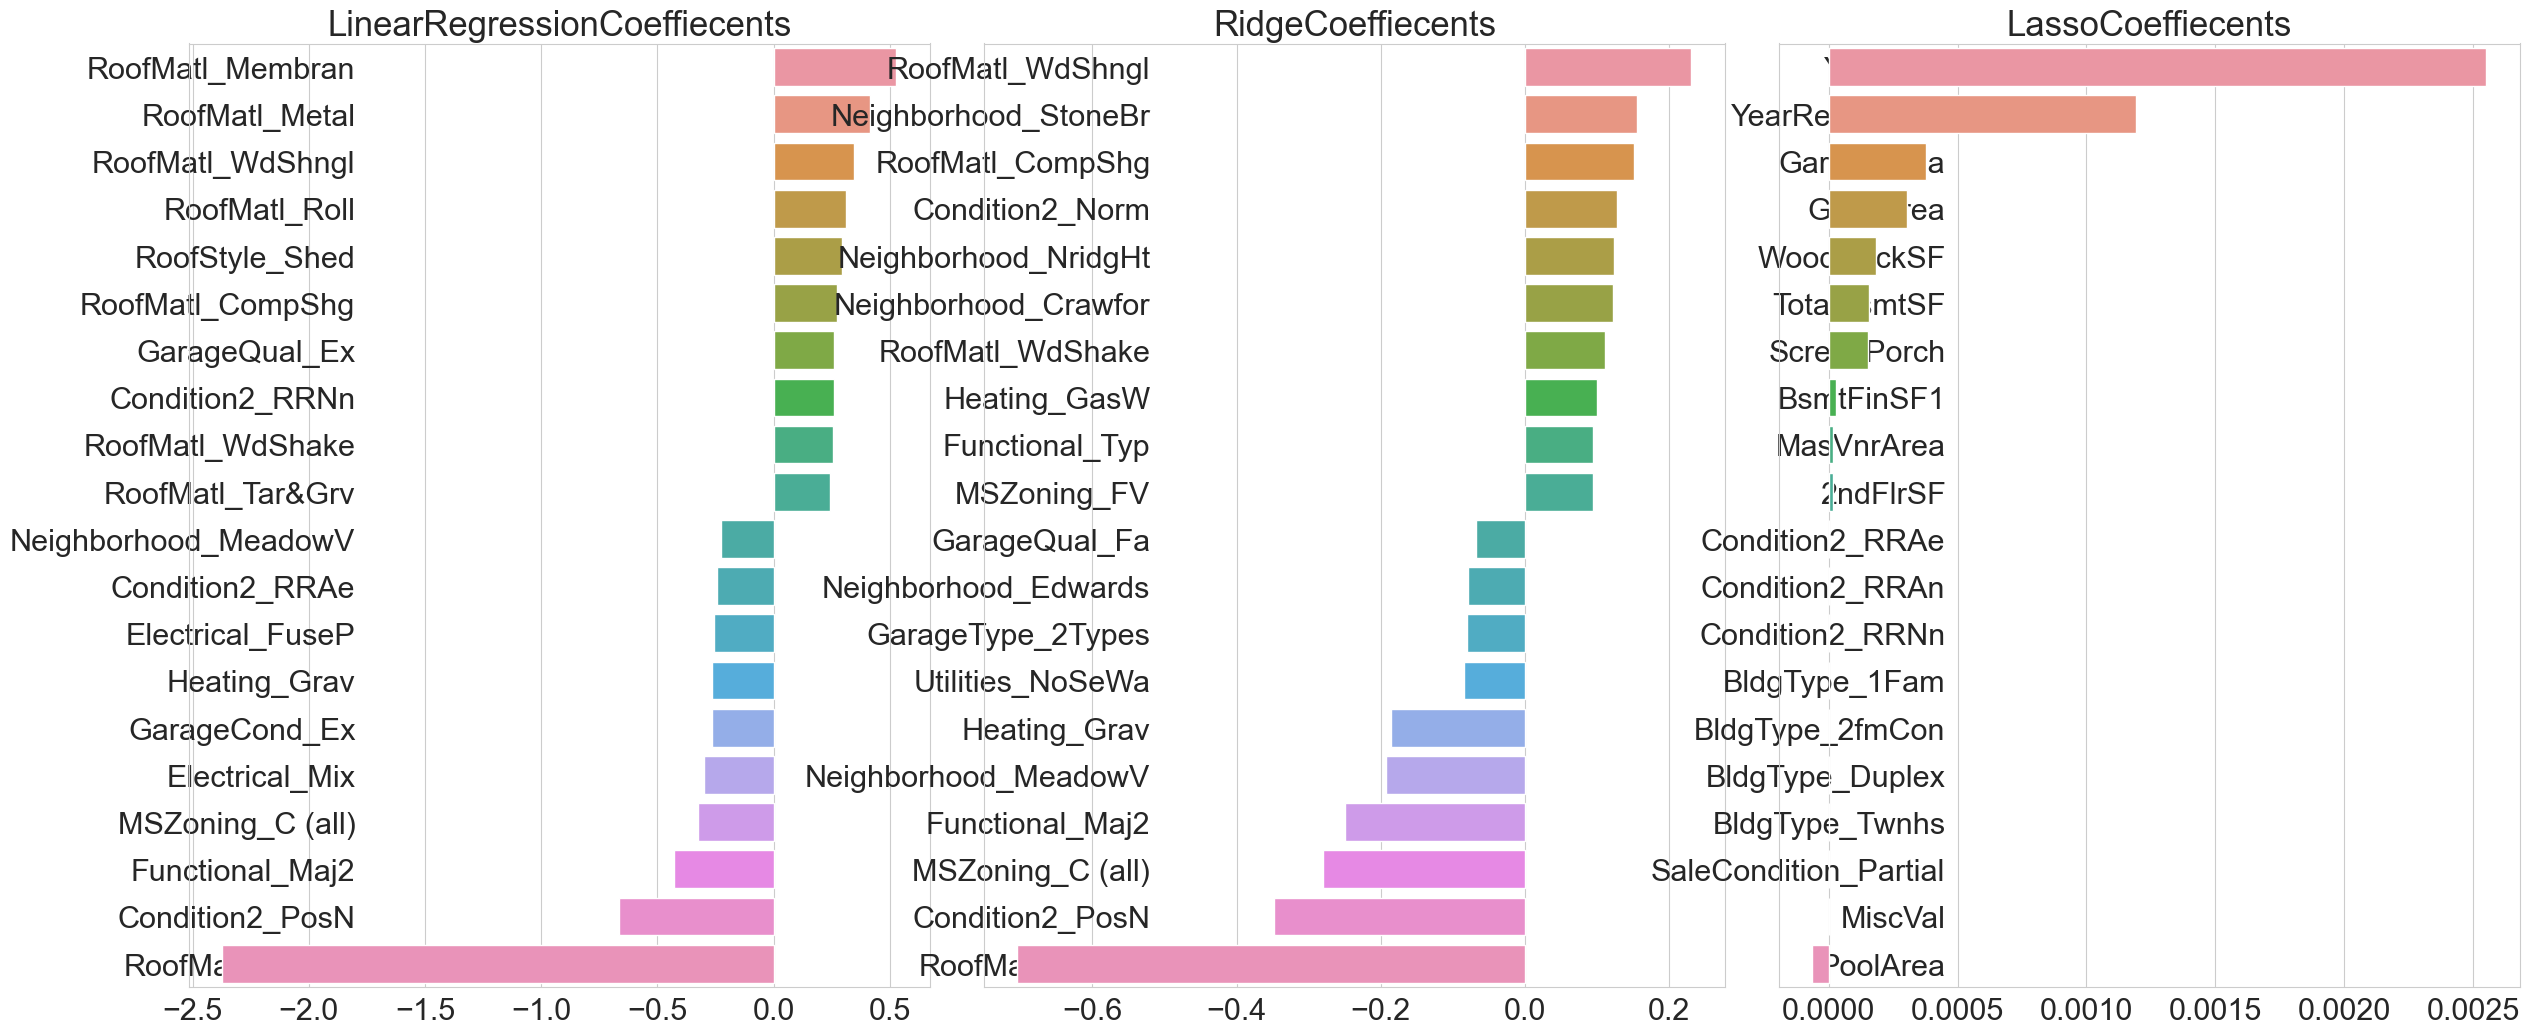

In [32]:
# 모델별 회귀 계수 시각화
def visualize_coefficient(models):
    # 모델 3개를 시각화하기 위해 3개의 칼럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24, 10), nrows=1, ncols=3)
    fig.tight_layout()
    for i_num, model in enumerate(models):
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        axs[i_num].set_title(model.__class__.__name__ + 'Coeffiecents', size=25)
        axs[i_num].tick_params(axis='y', direction='in', pad=-120)

        # 요 반복문을 안해주면 왼쪽에 보이는 폰트 크기가 작아서 잘 안보임
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])

models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [33]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):

    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring='neg_mean_squared_error', cv=5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} cv RMSE 값 리스트: {1}'.format(model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} cv 평균 RMSE 값: {1}'.format(model.__class__.__name__, np.round(rmse_avg, 3)))

models = [ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


Ridge cv RMSE 값 리스트: [0.117 0.154 0.142 0.117 0.189]
Ridge cv 평균 RMSE 값: 0.144

Lasso cv RMSE 값 리스트: [0.161 0.204 0.177 0.181 0.265]
Lasso cv 평균 RMSE 값: 0.198


In [34]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    # params가 변수로 들어가는 것임
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1 * grid_model.best_score_)
    print('{0} 5 cv 시 최적 평균 rmse 값: {1}, 최적 alpha: {2}'.format(model.__class__.__name__,
                                                               np.round(rmse, 4), grid_model.best_params_))

ridge_params = {'alpha' : [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha' : [0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 cv 시 최적 평균 rmse 값: 0.1418, 최적 alpha: {'alpha': 12}
Lasso 5 cv 시 최적 평균 rmse 값: 0.142, 최적 alpha: {'alpha': 0.001}


LinearRegression 로그 변환 된 RMSE: 0.132
Ridge 로그 변환 된 RMSE: 0.124
Lasso 로그 변환 된 RMSE: 0.12


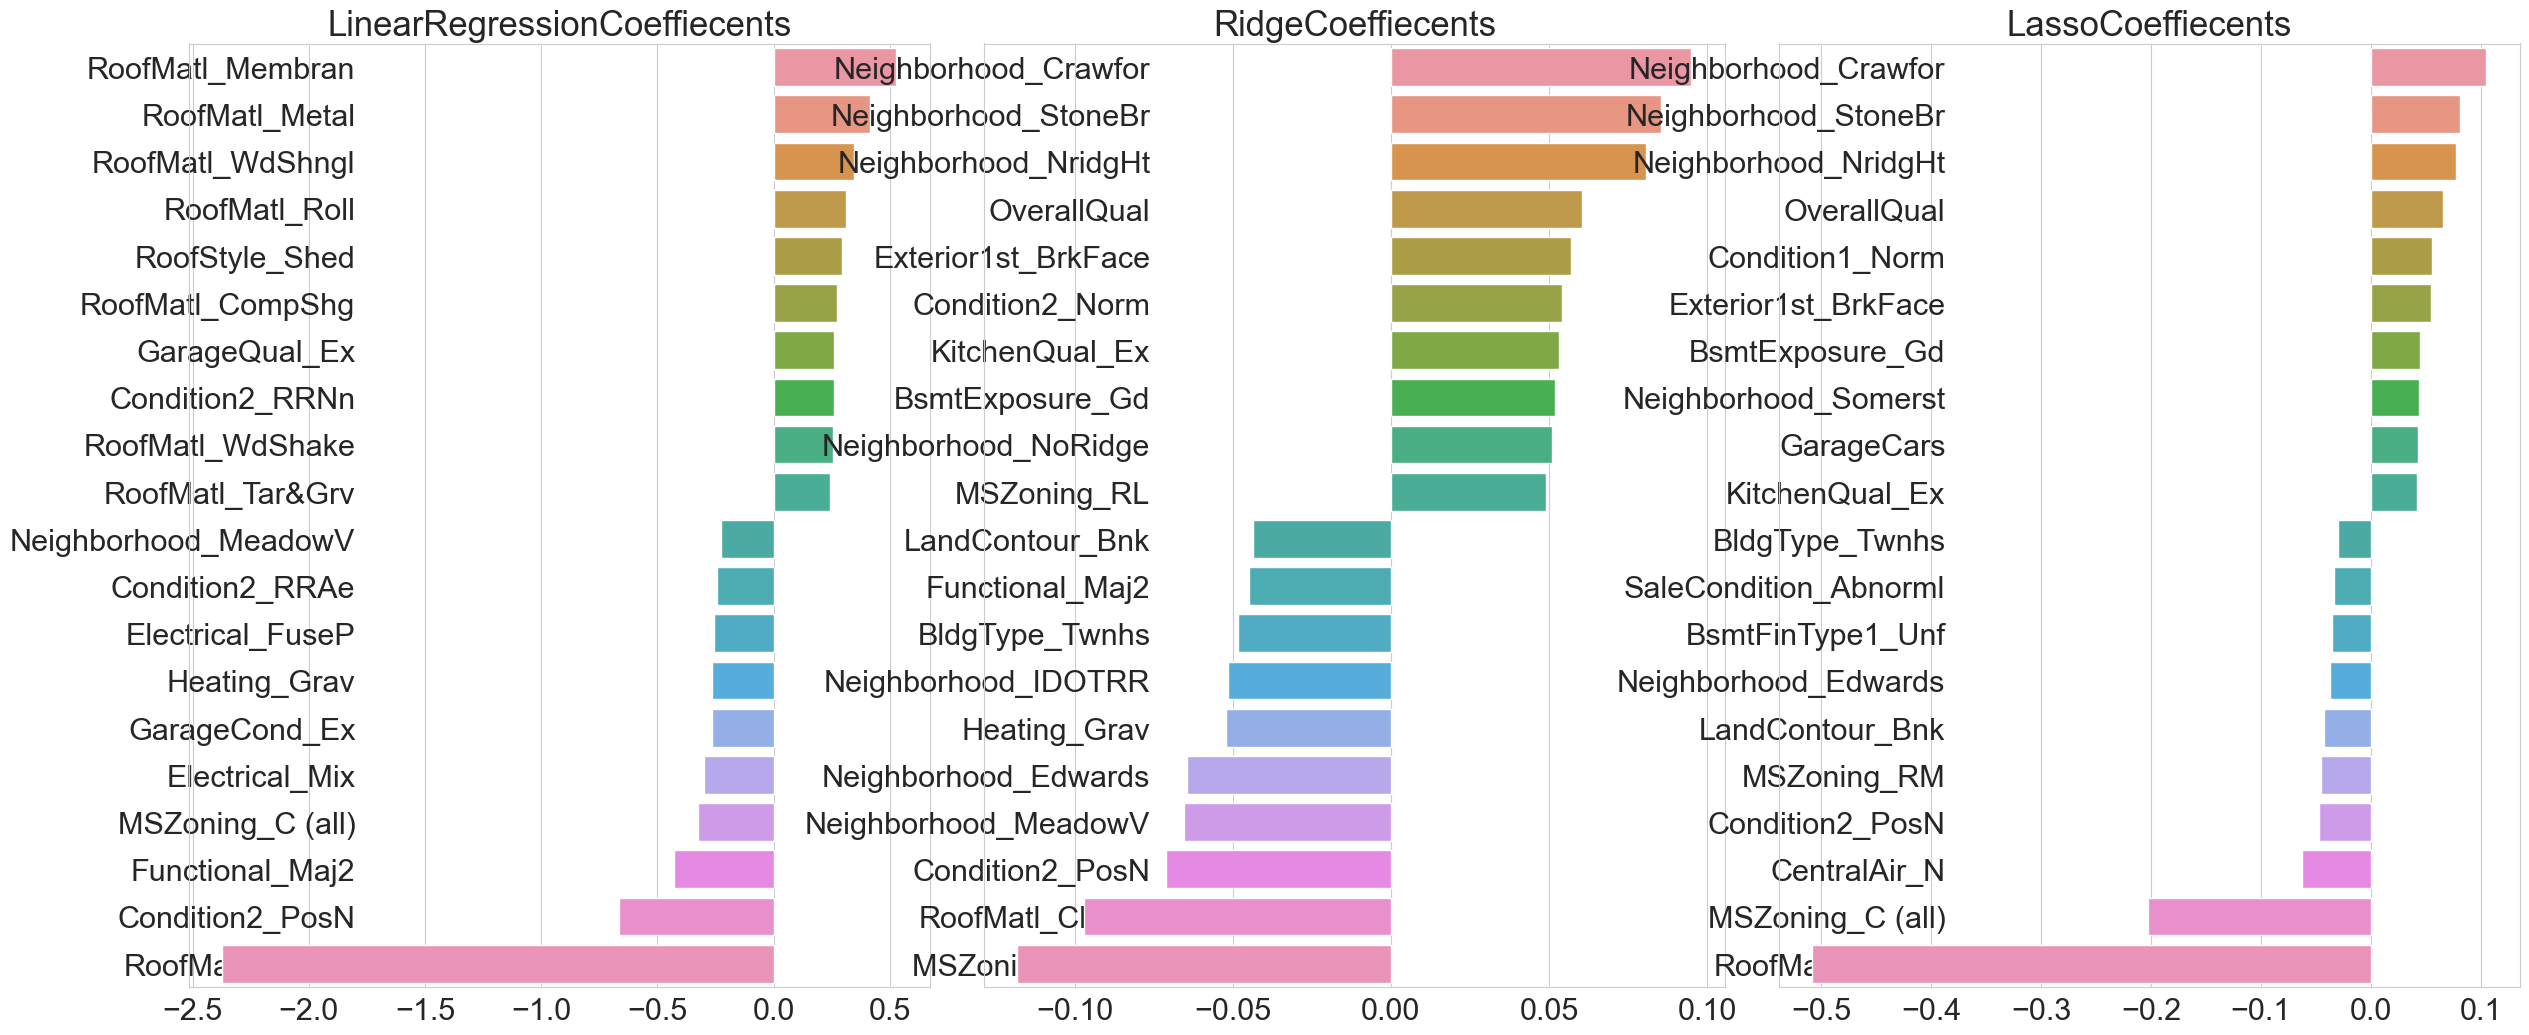

In [35]:
# 위에서 도출한 최적의 파라미터로 모델 수행하기
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lass_reg = Lasso(alpha=0.001)
lass_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lass_reg]
get_rmses(models)
visualize_coefficient(models)

### 추가적인 모델 튜닝 진행
1. 피처 데이터 세트의 데이터 분포도
2. 이상치 데이터 처리
    - 원본 데이터로 이상치 확인하고 로그 변환한 데이터 변환 고려해서 데이터 제거하기

In [41]:
# 1. 왜곡 정도 확인하기
from scipy.stats import skew

features_index = house_df.dtypes[house_df.dtypes != 'object'].index # 문자 형태의 열 제외
skew_features = house_df[features_index].apply(lambda x: skew(x))

# 왜곡 정도가 1 이상인 칼럼만 추출
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [42]:
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])
# 왜곡 정도가 높은 피처를 로그 변환

In [43]:
house_df_ohe = pd.get_dummies(house_df)
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

ridge_params = {'alpha' : [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha' : [0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

# 로그 변환을 하기 전과 다르게 최적 파라미터값이 바뀐 것을 확인할 수 있음

Ridge 5 cv 시 최적 평균 rmse 값: 0.1275, 최적 alpha: {'alpha': 10}
Lasso 5 cv 시 최적 평균 rmse 값: 0.1252, 최적 alpha: {'alpha': 0.001}


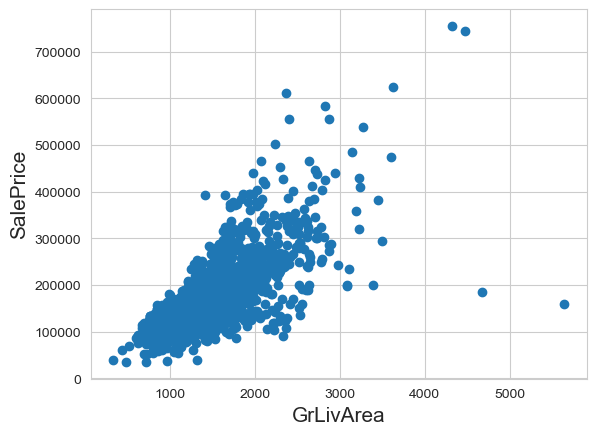

In [44]:
# 2. 이상치 데이터 처리하기
# 먼저 회귀 계수 시각화를 통해 가장 높은 회귀계수를 가지는 열이 'GrLivArea'인 것을 확인
# 예측에 많은 영향을 미치는 중요 피처의 이상치 데이터의 처리가 매우 중요하기 때문에 해당 열을 대상으로 이상치 처리 과정 수행
plt.scatter(x = house_df_org['GrLivArea'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

# 결과를 통해 오른쪽 아래 2개의 데이터가 이상하다는 것을 확인

In [46]:
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index

print('이상치 레코드 index:', outlier_index.values)
print('이상치 삭제 전 house_df_ohe shape:', house_df_ohe.shape)

house_df_ohe.drop(outlier_index, axis=0, inplace=True)
print('이상치 삭제 후 house_df_ohe shape:', house_df_ohe.shape)

이상치 레코드 index: [ 523 1298]
이상치 삭제 전 house_df_ohe shape: (1460, 271)
이상치 삭제 후 house_df_ohe shape: (1458, 271)


In [48]:
# 이상치 제거한 데이터로 다시 모델 수행
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

ridge_params = {'alpha' : [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha' : [0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 cv 시 최적 평균 rmse 값: 0.1125, 최적 alpha: {'alpha': 8}
Lasso 5 cv 시 최적 평균 rmse 값: 0.1122, 최적 alpha: {'alpha': 0.001}


LinearRegression 로그 변환 된 RMSE: 0.129
Ridge 로그 변환 된 RMSE: 0.103
Lasso 로그 변환 된 RMSE: 0.1


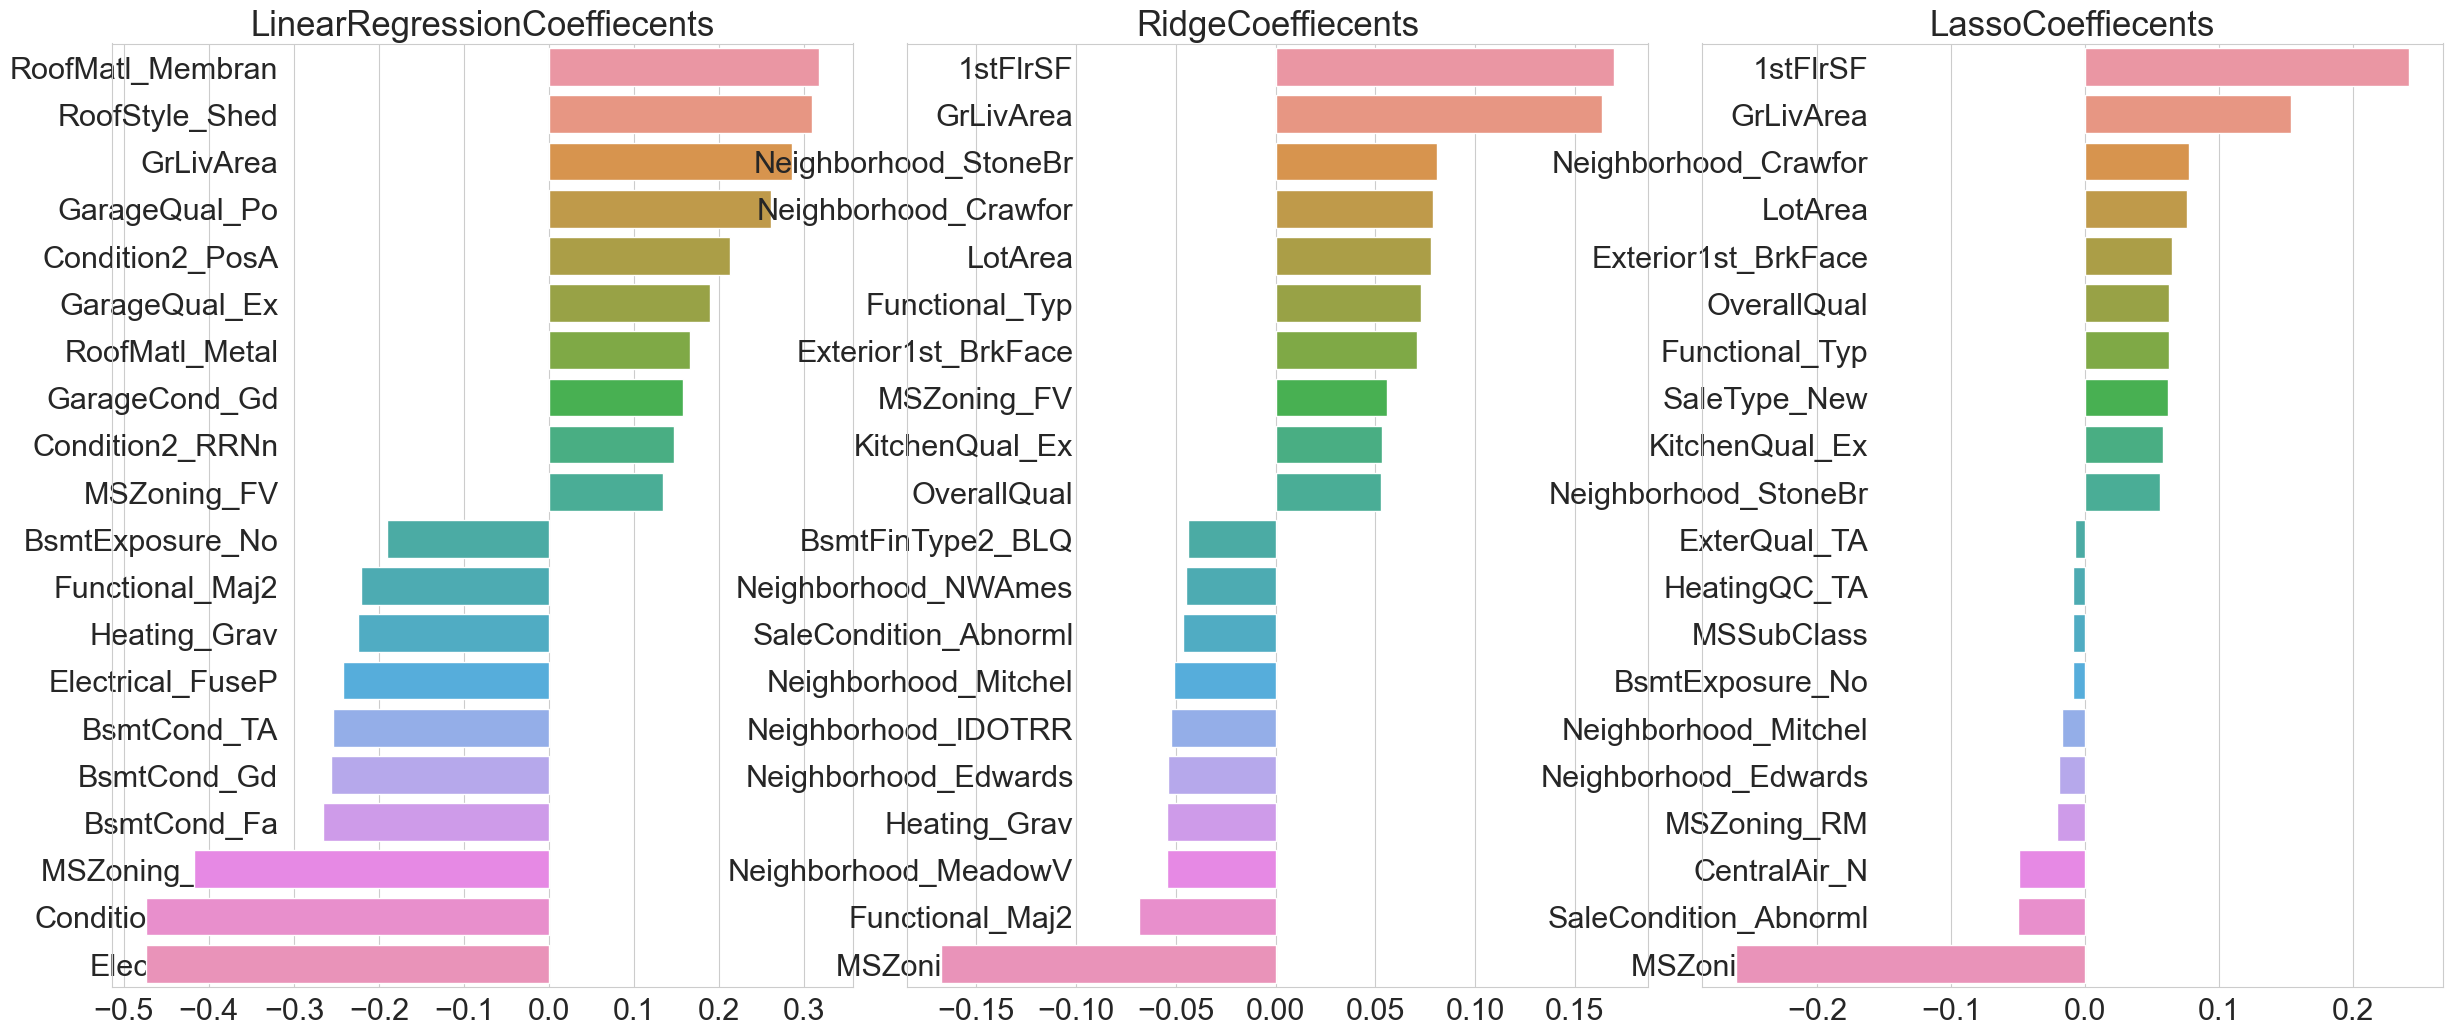

In [49]:
# 이상치 제거 후 하이퍼 파라미터를 적용한 모델의 예측 성능 값
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lass_reg = Lasso(alpha=0.001)
lass_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lass_reg]
get_rmses(models)
visualize_coefficient(models)

### 회귀 트리 모델 학습/예측/평가

In [53]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

xgb_params = {'n_estimators': [1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
print_best_params(xgb_reg, xgb_params)

XGBRegressor 5 cv 시 최적 평균 rmse 값: 0.1178, 최적 alpha: {'n_estimators': 1000}


In [51]:
# 회귀 모델의 예측 결과 혼합을 통한 최종 예측
def get_rmse_pred(preds):
    for key in preds.keys(): # 넣은 딕셔너리에서 key가 순차적으로 나오도록 설정
        pred_value = preds[key] # 그 키에 해당하는 value 지정
        mse = mean_squared_error(y_test, pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lass_reg = Lasso(alpha=0.001)
lass_reg.fit(X_train, y_train)

ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합' : pred,
         'Ridge' : ridge_pred,
         'Lasso' : lasso_pred}

get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.44951602878221203
Ridge 모델의 RMSE: 0.10345177546603257
Lasso 모델의 RMSE: 0.7370385111806937


In [55]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05,
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5*xgb_pred + 0.5*lgbm_pred
preds = {'최종혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}

get_rmse_pred(preds)

최종혼합 모델의 RMSE: 0.10170077353447762
XGBM 모델의 RMSE: 0.10738295638346222
LGBM 모델의 RMSE: 0.10382510019327311


### 스태킹 앙상블 모델을 통한 회귀 예측

In [61]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    kf = KFold(n_splits=n_folds, shuffle=False)
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, 'model 시작')

    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        print('\t폴드 세트:', folder_counter, '시작')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]

        model.fit(X_tr, y_tr)
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        test_pred[:, folder_counter] = model.predict(X_test_n)

    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    return train_fold_pred, test_pred_mean

In [62]:
# 스태킹 함수가 넘파이를 인자로 사용하므로 데이터프레임을 넘파이로 변환
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge model 시작
	폴드 세트: 0 시작
	폴드 세트: 1 시작
	폴드 세트: 2 시작
	폴드 세트: 3 시작
	폴드 세트: 4 시작
Lasso model 시작
	폴드 세트: 0 시작
	폴드 세트: 1 시작
	폴드 세트: 2 시작
	폴드 세트: 3 시작
	폴드 세트: 4 시작
XGBRegressor model 시작
	폴드 세트: 0 시작
	폴드 세트: 1 시작
	폴드 세트: 2 시작
	폴드 세트: 3 시작
	폴드 세트: 4 시작
LGBMRegressor model 시작
	폴드 세트: 0 시작
	폴드 세트: 1 시작
	폴드 세트: 2 시작
	폴드 세트: 3 시작
	폴드 세트: 4 시작


In [64]:
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis=1)

meta_model_lasso = Lasso(alpha=0.0005)

meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.09889348019616422
